# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Quentin MASSINON 24750900

Part. 2: Théo Cheffert 25882000

Part. 3: Ismail Berrada 03602200 

Part. 4: Quentin Bouccin 32511800

Part. 5: Mehdi Sassoui 78562100

Part. 6:  Pol CRAHAY 69402200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [3]:
df_shanghai = pd.read_csv("ShanghaiPM.csv")
df_beijing = pd.read_csv("BeijingPM.csv")

values_to_keep = df_beijing["PM_US Post"].notna()
for i in range(len(values_to_keep)):
    values_to_keep[i] = values_to_keep[i] and not np.isnan(df_shanghai["PM_US Post"][i])

df_beijing = df_beijing[values_to_keep]
df_beijing_summer = df_beijing[df_beijing["season"] == 2]
df_beijing_winter = df_beijing[df_beijing["season"] == 4]

df_shanghai = df_shanghai[values_to_keep]
df_shanghai_summer = df_shanghai[df_shanghai["season"] == 2]
df_shanghai_winter = df_shanghai[df_shanghai["season"] == 4]


b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [4]:
def analysis(df, name):
    values = df["PM_US Post"]
    mean = values.mean()
    variance = values.var()
    median = np.median(values)
    quantile_25 = np.quantile(values, 0.25)
    quantile_75 = np.quantile(values, 0.75)
    print("{} mean: {}, variance: {}, median: {}, 25% quantile: {}, 75% quantile: {}".format(
        name, mean, variance, median, quantile_25, quantile_75
    ))

analysis(df_beijing_summer, "Beijing summer:")
analysis(df_beijing_winter, "Beijing winter:")
analysis(df_shanghai_summer, "Shanghai summer:")
analysis(df_shanghai_winter, "Shanghai winter:")


Beijing summer: mean: 71.84084337349398, variance: 2978.2273471618737, median: 59.0, 25% quantile: 30.0, 75% quantile: 100.0
Beijing winter: mean: 122.42691387559809, variance: 15509.29983782486, median: 82.0, 25% quantile: 21.0, 75% quantile: 180.0
Shanghai summer: mean: 33.89180722891566, variance: 611.4814848646303, median: 29.0, 25% quantile: 16.0, 75% quantile: 46.0
Shanghai winter: mean: 76.19473684210526, variance: 3341.130873121312, median: 60.0, 25% quantile: 36.0, 75% quantile: 99.0


Beijing summer: mean: 71.84084337349398, variance: 2978.227347161877, median: 59.0, 25% quantile: 30.0, 75% quantile: 100.0

Beijing winter: mean: 122.42691387559809, variance: 15509.299837824774, median: 82.0, 25% quantile: 21.0, 75% quantile: 180.0

Shanghai summer: mean: 33.89180722891566, variance: 611.4814848646263, median: 29.0, 25% quantile: 16.0, 75% quantile: 46.0

Shanghai winter: mean: 76.19473684210526, variance: 3341.1308731213794, median: 60.0, 25% quantile: 36.0, 75% quantile: 99.0


Comments here: 
The results for Beijing and Shanghai (summer and winter) look reasonable, nevertheless the variance in winter for Beijing seems high compared to summer. This can indicate a higher variability in PM2.5 levels during winter months, which is expected due to factors like heating in cold weather.

|                 | Mean $\mu$         | Variance $\sigma$  | Median (50%) | 25% quantile | 75% quantile |
| ----------------| ------------------ | ------------------ | ------ | ------------ | ------------ |
| Beijing summer  | 71.84084337349398  | 2978.227347161877  | 59.0   | 30.0         | 100.0        |
| Beijing winter  | 122.42691387559809 | 15509.299837824774 | 82.0   | 21.0         | 180.0        |
| Shanghai summer | 33.89180722891566  | 611.4814848646263  | 29.0   | 16.0         | 46.0         |
| Shanghai winter | 76.19473684210526  | 3341.1308731213794 | 60.0   | 36.0         | 99.0         | 



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



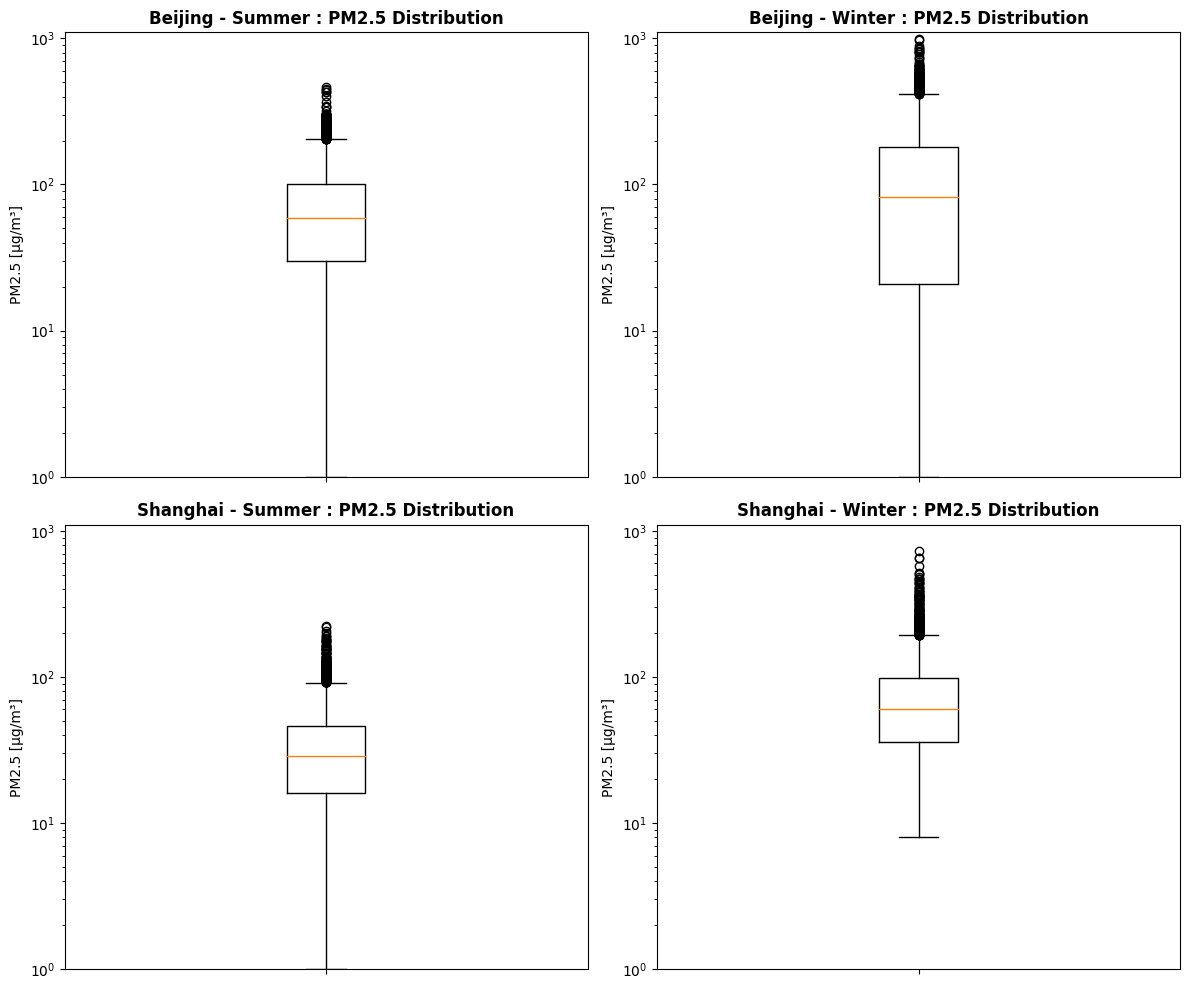

In [5]:
values = [df_beijing_summer["PM_US Post"], df_beijing_winter["PM_US Post"],
          df_shanghai_summer["PM_US Post"], df_shanghai_winter["PM_US Post"]]
names = ["Beijing - Summer", "Beijing - Winter", "Shanghai - Summer", "Shanghai - Winter"]

plt.figure(figsize=(12, 10))
for i in range(len(values)): 
    plt.subplot(2, 2, i+1, ylim=(1, 1100), yscale="log")
    plt.ylabel('PM2.5 [µg/m³]')
    plt.title(f'{names[i]} : PM2.5 Distribution', fontweight="bold")
    plt.boxplot(values[i], autorange=False, labels=[""])
plt.tight_layout()
plt.show()

We are using a logarithmic scale in the graph.
According to WHO guidelines, the annual average concentration of PM2.5 should remain below 5 µg/m³, and 24-hour average exposures should not surpass 15 µg/m³ on more than 3 to 4 days per year. 
- The median PM2.5 concentration is higher than the recommended average amount in both Beijing and Shanghai all year round. Because there are only outliers above the median, the average PM2.5 concentration it also higher than the recommended average
- The median PM2.5 concentration is higher in winter than in summer in both Beijing and Shanghai
- There are a lot of outliers above the third quartile + 1.5 inter-quartile range mark


## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [6]:
# Extract PM2.5 values
def get_PM2_5_values(df):
    return df["PM_US Post"].values

# Function to fit Gamma distribution and calculate log-likelihood
def gamma_log_likelihood(data, city, season):
    # Gamma with Maximum Likelihood Estimation with floc=0 (force location to zero bc Gamma only for positive nbr)
    params = stats.gamma.fit(data, floc=0)  #Tuple like: (shape, loc, scale)
    
    # Extract the shape and scale parameters from the tuple (loc is fixed to 0)
    shape = params[0]
    loc = params[1]
    scale = params[2]
    
    # Calculate the log-likelihood
    log_likelihood = np.sum(stats.gamma.logpdf(data, a=shape, scale=scale, loc=loc))
    
    # Store results in a dictionary
    result = {
        'City': city,
        'Season': season,
        'Shape (α)': shape,  #Mean = a * b and var = a * b²
        'Scale (β=1/λ)': scale,
        'Log-Likelihood': log_likelihood
    }
    return result

# Get the PM2.5 values for the 4
PM_values = [] #Put them in a array
beijing_winter_PMvalues = get_PM2_5_values(df_beijing_winter)
PM_values.append(beijing_winter_PMvalues)

beijing_summer_PMvalues = get_PM2_5_values(df_beijing_summer)
PM_values.append(beijing_summer_PMvalues)

shanghai_winter_PMvalues = get_PM2_5_values(df_shanghai_winter)
PM_values.append(shanghai_winter_PMvalues)

shanghai_summer_PMvalues = get_PM2_5_values(df_shanghai_summer)
PM_values.append(shanghai_summer_PMvalues)


# Fit Gamma and calculate log-likelihood for each city and season
results_gamma_log = []
results_gamma_log.append(gamma_log_likelihood(beijing_winter_PMvalues, "Beijing", "Winter"))
results_gamma_log.append(gamma_log_likelihood(beijing_summer_PMvalues, "Beijing", "Summer"))
results_gamma_log.append(gamma_log_likelihood(shanghai_winter_PMvalues, "Shanghai", "Winter"))
results_gamma_log.append(gamma_log_likelihood(shanghai_summer_PMvalues, "Shanghai", "Summer"))

# Results in DataFrame for clean presentation
results_into_df = pd.DataFrame(results_gamma_log)

# Display the result table
print("========== Gamma parameters by log-likelihood maximization (MLE) with the log-likelihood ==========\n")
print(results_into_df)

========== Gamma parameters by log-likelihood maximization (MLE) with the log-likelihood ==========

       City  Season  Shape (α)  Scale (β=1/λ)  Log-Likelihood
0   Beijing  Winter   0.945554     129.476386   -48542.152092
1   Beijing  Summer   1.700798      42.239487   -43175.928971
2  Shanghai  Winter   2.249619      33.870058   -43318.213798
3  Shanghai  Summer   1.758744      19.270458   -36870.989338


b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

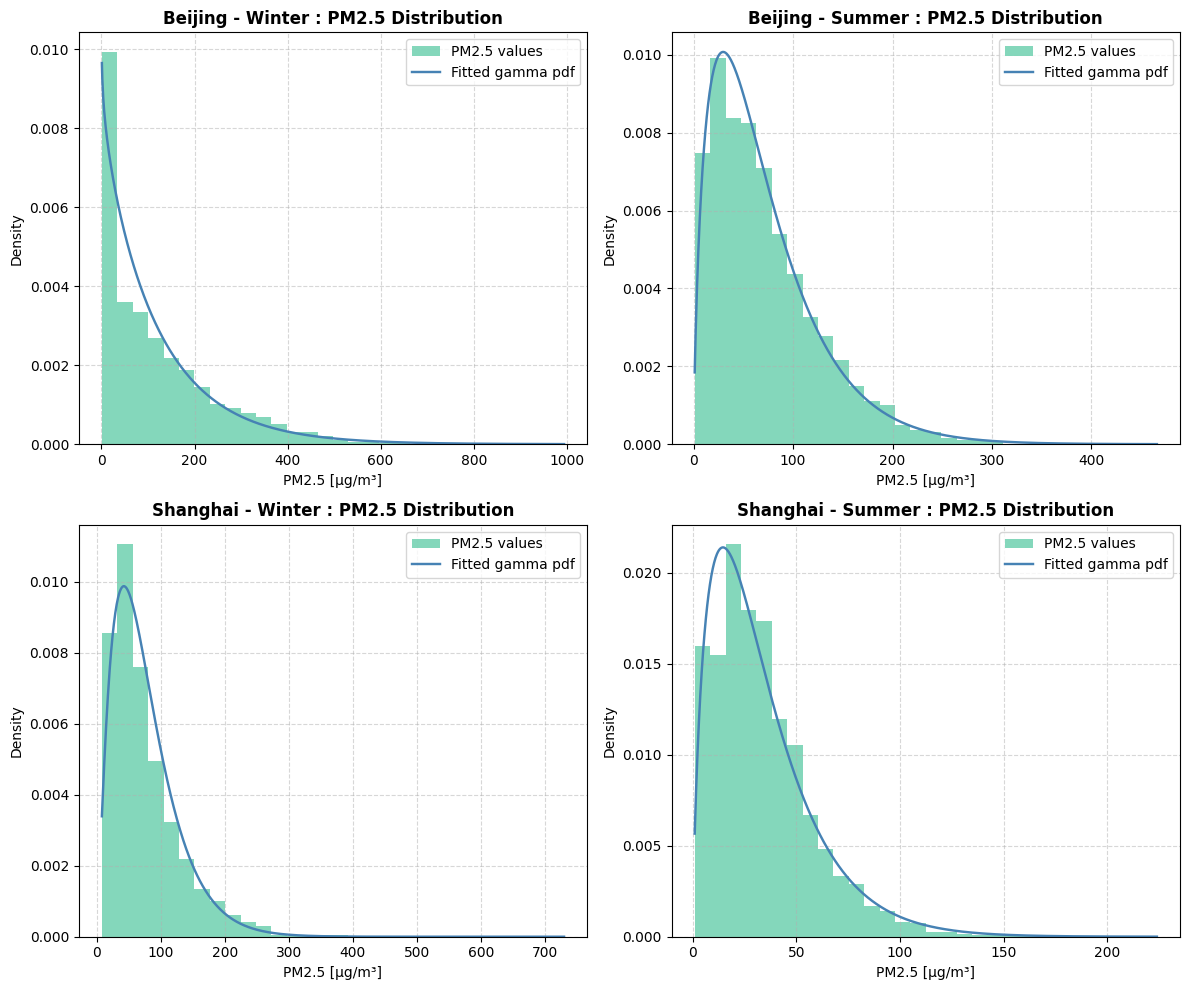

In [7]:
# Function to plot histogram with Gamma PDF overlay
def plot_histogram_gamma(data, shape, scale, city, season):
    # Histogram of the data
    plt.hist(data, bins=30, density=True, alpha=0.8, color='mediumaquamarine', label='PM2.5 values')

    # Generate the range of values for plotting the Gamma PDF
    values = np.linspace(min(data), max(data), 1000)
    
    # Plot the Gamma PDF using the estimated parameters
    gamma_pdf = stats.gamma.pdf(values, a=shape, scale=scale)
    plt.plot(values, gamma_pdf, 'steelblue', label=f'Fitted gamma pdf', lw=1.75)

    # Title and labels
    plt.title(f'{city} - {season} : PM2.5 Distribution', fontweight="bold")
    plt.xlabel('PM2.5 [µg/m³]')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.5)

#--- Ploting the 4 graphs ---#
plt.figure(figsize=(12, 10))  #Size
for i in range(len(results_gamma_log)):
    plt.subplot(2, 2, i+1)
    plot_histogram_gamma(PM_values[i], shape=results_gamma_log[i]['Shape (α)'], scale=results_gamma_log[i]['Scale (β=1/λ)'],
        city=results_gamma_log[i]['City'], season=results_gamma_log[i]['Season'])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<u>***Comments here:***</u>

**Quality of the graphics:**

* Beijing Winter: Shape parameter Alpha is small, approximately 0.95; this shows that the distribution is highly skewed (not symmetric) and heavy-tailed (decreasing exponential form). That agrees with real data since the Beijing winter emissions are more dispersed and its histogram is heavily skewed. The PDF does indeed follow well the peak and tail of the histogram. This implies that we have a pretty good gamma which fits most of the data quite well.
* Beijing Summer: Shape parameter Alpha is larger ~1.7 which means a more symmetric distribution. The PDF, in this case, fits the histogram distribution more closely. The PDF fits the data pretty well too.
* Shanghai Winter: Shape parameter Alpha is about 2.25 which means that the PDF is quite close to a Gaussian shape. If we look at the graph, then the distribution resembles much like a Gaussian indeed. However, the peak of this histogram is higher compared to the case of the gamma distribution. Also, we don't take negative (< 0) values of PM2.5, so we cut off a part of the Gaussian towards left (Gamma is for non-negative numbers!). If we consider this also, it's clear that if these values were included, the distribution takes a form of Gaussian distribution.
* Shanghai Summer: This distribution is once more closer to a Gamma distribution with moderate skewness ~1.75. The PDF therefore reflects it through fitting the histogram fairly close, like in winter. In this case we should be able to confirm that is, indeed a Gaussian with more or less the same characeristics than in winter. The data though is slightly shifted to the right compared to the PDF.

**Overall Critique About Estimation:**

Generally we have a good fit! Gamma distributions often fit environmental data such as PM2.5 since Gamma distributions model non-negative, skewed data well. The 4 fitted PDFs matched the peaks of the histograms and followed the skew of the data in most cases very closely. That means estimation did a good job! However, the PDFs are not capturing the peak so well for Beijing and Shanghai Winter. That probably suggests Gamma distribution failing to capture the variability in most extreme cases. But overall, it's a pretty good estimation.


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [8]:
# List where we'll store the results
expected_results = []

for elem in results_gamma_log:
    #Get the data for the city and its season
    shape = elem['Shape (α)']
    scale = elem['Scale (β=1/λ)']
    city = elem['City']
    season = elem['Season']
    
    # Mean and standard deviation calculations
    mean = shape * scale #α * β
    standard_deviation = np.sqrt((shape * (scale ** 2))) #sqrt(α*β²)
    
    # Percentiles for the 'elem'
    per_25 = stats.gamma.ppf(0.25, a=shape, scale=scale)
    median_50 = stats.gamma.ppf(0.50, a=shape, scale=scale)
    per_75 = stats.gamma.ppf(0.75, a=shape, scale=scale)
    
    # Append results to the list
    expected_results.append({
        'City': city,
        'Season': season,
        'Mean (μ)': mean,
        'Standard Deviation (σ)': standard_deviation,
        '25% Percentile': per_25,
        '50% Percentile (Median)': median_50,
        '75% Percentile': per_75
    })

# Convert to DataFrame for printing
expected_results_df = pd.DataFrame(expected_results)

# Show the results
print("========== Statistics of PM2.5 based on fitted Gamma distributions found in the previous question ==========\n")
print(expected_results_df)



========== Statistics of PM2.5 based on fitted Gamma distributions found in the previous question ==========

       City  Season    Mean (μ)  Standard Deviation (σ)  25% Percentile  \
0   Beijing  Winter  122.426914              125.902321       33.213734   
1   Beijing  Summer   71.840843               55.086481       31.494866   
2  Shanghai  Winter   76.194737               50.800789       38.846393   
3  Shanghai  Summer   33.891807               25.556030       15.160290   

   50% Percentile (Median)  75% Percentile  
0                82.936571      169.732857  
1                58.356072       97.712423  
2                65.250605      101.749696  
3                27.729424       46.005220  


<u>***Comments here:***</u>

For a Gamma distribution, the mean ($\mu$) and the standard deviation ($\sqrt{\sigma²} = \sigma$) can be found with its shape ($\alpha$) and its scale ($\beta$) like so:
* Mean : $\mu = \alpha \cdot \beta$ 
* Standard Deviation : $\sigma = \sqrt{\alpha \cdot \beta²}\;$ where variance $\sigma² = \alpha \cdot \beta²$

**Comparing values**

We present our results in two tables. In the first, we have put the empirical results found in the previous question, and in the second, the result we have just found.

* Real values found in the first question (1.1.b)

|                 | Mean $\mu$  | Standard deviation $\sigma = \sqrt{variance}$ | 25% quantile | Median (50%)| 75% quantile |
| ----------------| ------------------ | ------------------ | ------ | ------------ | ------------ |
| Beijing winter  | 122.42691387559809 | 124.5363394        |  21.0  |  82.0        | 180.0        |
| Beijing summer  | 71.84084337349398  | 54.5731376         |  30.0  |  59.0        | 100.0        |
| Shanghai winter | 76.19473684210526  | 57.80251615        |  36.0  |  60.0        | 99.0         | 
| Shanghai summer | 33.89180722891566  | 24.72815167        |  16.0  |  29.0        | 46.0         |


* Fitted gamma values

|                 | Mean $\mu$  | Standard deviation $\sigma$ | 25% quantile | Median (50%) | 75% quantile |
| ----------------| ------------------ | ------------------ | ------ | ------------ | ------------ |
| Beijing winter  | 122.426914  | 125.902321         | 33.213734   | 82.936571 | 169.732857 |
| Beijing summer  | 71.840843   | 55.086481          | 31.494866   | 58.356072 | 97.712423  |
| Shanghai winter | 76.194737   | 50.800789          | 38.846393   | 65.250605 | 101.749696 | 
| Shanghai summer | 33.891807   | 25.556030          | 15.160290   | 27.729424 | 46.005220  |

**Commenting the results found**

<u>1. Beijing Winter</u>

- Both the empirical mean (122.43) and the Gamma mean (122.43) are identical, suggesting that the Gamma distribution’s central tendency matches the data well. The Gamma model’s standard deviation (125.90) is close to the empirical standard deviation (124.54), though slightly higher. This implies a reasonable fit to the data's variability.
- Percentiles:
    * 25% Quantile: The gamma model (33.21) overestimates the lower tail. This compares to the empirical 25 percent (21.0), which indicates that the lower range cannot be accurately captured...
    *  The other two quantiles (median (50%) and 75% quantile) are well estimated because they closely match the empirical data. So we have a good middle and upper range approximation.

*Critique:* The Gamma distribution captures the mean and median well but it overestimates the lower percentile. This indicates the potential difficulty in modeling **lower** ranges. This suggests a reasonable but not perfect fit.

<u>2. Beijing Summer</u>

- The Gamma (71.84) and empirical mean (71.84) align exactly, showing a strong central fit. The standard deviations are also close, with the Gamma at 55.09 and the empirical data at 54.57, indicating an accurate fit for variability.
- Percentiles:
    * All the 3 quantiles (25% Quantile, Median (50%), 75% Quantile) have a good match with the empirical data. Therefore, we have a good lower-tail and upper range fit and but also a good central portion distribution.

*Critique:* The Gamma distribution fits Beijing summer data closely, with only minor discrepancies, suggesting it’s an **effective model** for this dataset.

<u>3. Shanghai Winter</u>

- The empirical (76.19) and Gamma mean (76.19) match well, indicating that the Gamma distribution captures the central tendency. The Gamma model’s standard deviation (50.80) is slightly lower than the empirical (57.80), suggesting that the Gamma model underestimates variability.
- Percentiles:
    * 25% Quantile: The Gamma value (38.85) is slightly higher than the empirical (36.0), indicating the Gamma distribution may slightly overestimate the lower values.
    * Median (50%) and 75% Quantile: are close with the empirical values.

*Critique:* The Gamma distribution fits fairly well but **underestimates variability** in the lower range.

<u>4. Shanghai Summer</u>

- The Gamma and empirical means (33.89) match well and the standard deviations (Gamma (25.56) and empirical (24.73)) are also well aligned. This suggests a strong fit for the variability.
- Percentiles:
    * 25% Quantile, Median (50%) and 75% Quantile: The Gamma values are nearly identical with the empirical ones. So we have a good lower, central and upper fit.

*Critique:* The Gamma distribution fits Shanghai summer data **well** across all metrics.

**Overall Critique of thoses values**

The Gamma distribution is generally a good fit for many datasets. 

The Gamma distribution mean fits well in all cases with the empirical means, which indicates that it's a good model for central values. The Gamma model sometimes captures the variability quite poorly, as can be seen especially in Shanghai winter, which may indicate that it doesn't catch the spread in cases with higher variation. Finally, the Gamma distribution has some problems in the lower tail values in some cases, especially Beijing winter, but generally fits the median and the upper percentiles.

To conclude, although the Gamma distribution is a solid model for many distributions, especially for central measures like medians and centrality values, it may not accurately represent extreme values in the tails of some distributions. So the Gamma distribution is useful for some cases but exploring other distributions could enhance accuracy in situations with significant variability or skewness.

------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

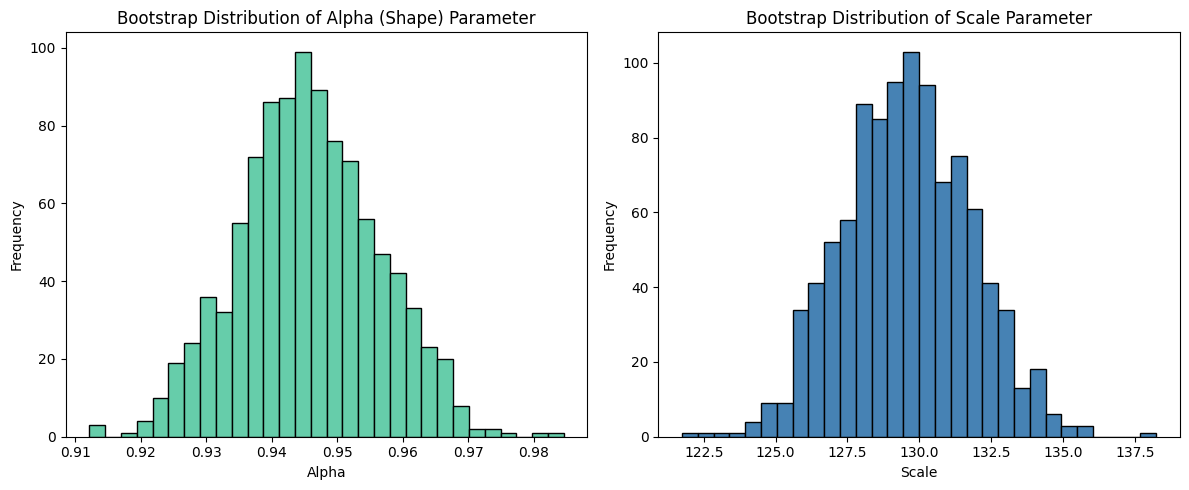

5% Confidence Interval for Alpha (Shape): [0.92559073 0.9663844 ]
5% Confidence Interval for Scale: [125.558742   133.96804021]


In [9]:
def bootstrap_gamma_params(data, n_bootstrap=1000, sample_size=6000):
    alpha_samples = []
    scale_samples = []
    
    for _ in range(n_bootstrap):
        # Bootstrap sample
        sample = np.random.choice(data, size=sample_size, replace=True)
        
        # Fit Gamma distribution to the sample
        params = stats.gamma.fit(sample, floc=0)
        alpha_samples.append(params[0])
        scale_samples.append(params[2])
    
    return alpha_samples, scale_samples

# Define beijing_winter_PMvalues
beijing_winter_PMvalues = get_PM2_5_values(df_beijing_winter)

# Perform bootstrap sampling
alpha_samples, scale_samples = bootstrap_gamma_params(beijing_winter_PMvalues)

# Plot histograms of the estimated alpha and scale parameters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(alpha_samples, bins=30, color='mediumaquamarine', edgecolor='black')
plt.title('Bootstrap Distribution of Alpha (Shape) Parameter')
plt.xlabel('Alpha')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scale_samples, bins=30, color='steelblue', edgecolor='black')
plt.title('Bootstrap Distribution of Scale Parameter')
plt.xlabel('Scale')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute 5% confidence intervals for the parameters
alpha_ci = np.percentile(alpha_samples, [2.5, 97.5])
scale_ci = np.percentile(scale_samples, [2.5, 97.5])

print(f"5% Confidence Interval for Alpha (Shape): {alpha_ci}")
print(f"5% Confidence Interval for Scale: {scale_ci}")



Comments here:
The narrow confidence intervals for both the alpha and scale parameters suggest that the Maximum Likelihood Estimation (MLE) method provides stable and precise estimates for these parameters. This indicates that the MLE estimators are accurate for the given dataset of PM2.5 emissions in Beijing during winter. This high level of precision indicates that the method used is effective and the results can be trusted


## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [10]:
df_beijing = pd.read_csv("BeijingPM.csv") 

df_beijing_winter = df_beijing[df_beijing["season"] == 4] 

df_beijing_winter = df_beijing_winter.dropna(subset=["PM_US Post", "DEWP", "HUMI", "PRES", "TEMP", "Iws", "precipitation"]) 

df_beijing_winter = pd.get_dummies(data=df_beijing_winter,columns=["cbwd"], drop_first=True)

df_beijing_winter["cbwd_NW"] = df_beijing_winter["cbwd_NW"].astype(int)
df_beijing_winter["cbwd_SE"] = df_beijing_winter["cbwd_SE"].astype(int)
df_beijing_winter["cbwd_cv"] = df_beijing_winter["cbwd_cv"].astype(int)

Y = df_beijing_winter["PM_US Post"]
X = df_beijing_winter[["DEWP", "HUMI", "PRES", "TEMP", "Iws", "cbwd_NW", "cbwd_SE", "cbwd_cv", "precipitation"]]

Xb=np.mean(X) 
Yb= np.mean(Y)
b1=np.sum((X-Xb)*(Y-Yb))/np.sum((X-Xb)**2)   
b0=Yb-b1*Xb

Xm  = sm.add_constant(X)

results = sm.OLS(Y,Xm).fit()

print(results.summary())

/home/theo/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:34:49   Log-Likelihood:                -73083.
No. Observations:               12418   AIC:                         1.462e+05
Df Residuals:                   12408   BIC:                         1.463e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2441.7186    144.242     16.928

Comments here:


The t-statistics and interpretations of the model variables, on average:

1. **Constant (2441.7186)**
T-stat: 16.928 - Highly significant but without direct physical interpretation (theoretical baseline).

2. **Dew Point (DEWP: 0.7013)**
T-stat: 1.637 - Slightly significant; dew point has no major impact on PM2.5 in winter.

3. **Humidity (HUMI: 2.8105)**
T-stat: 23.162 - Highly significant; higher humidity is associated with increased PM2.5 due to stagnant conditions.

4. **Pressure (PRES: -2.3781)**
T-stat: -17.025 - Significant and negative; high pressure reduces PM2.5, likely by dispersing pollutants.

5. **Temperature (TEMP: 3.1491)**
T-stat: 8.284 - Significant; temperature is positively linked to PM2.5, limiting vertical dispersion.

6. **Wind Speed (Iws: -0.0886)**
T-stat: -6.448 - Inversely significant; stronger winds disperse PM2.5, reducing pollution.

7. **NW Wind (cbwd_NW: -8.0278)**
T-stat: -3.204 - Inversely significant; northwest winds slightly reduce PM2.5.

8. **SE Wind (cbwd_SE: 15.1642)**
T-stat: 5.414 - Significant; southeast wind increases PM2.5, potentially bringing pollutants.

9. **Calm Wind (cbwd_cv: 32.3099)**
T-stat: 11.559 - Highly significant; calm conditions favor PM2.5 accumulation.

10. **Precipitation (precipitation: -226.0789)**

T-stat: -15.270 - Highly inversely significant; precipitation strongly reduces PM2.5, cleaning the air.

Model Fit:
- **R²: 0.474** - The model explains about <u>*47.4%*</u> of the variance in PM2.5 levels. This represents a moderate fit, indicating that a significant part of PM2.5 variations is explained by the model variables, though other factors not included may also influence pollution.

F-statistic:
- In this model, the F-statistic is **very high (1245)**, and the p-value is almost *zero*. This indicates that the overall model is statistically significant, meaning that the selected predictors (humidity, pressure, temperature, wind direction, precipitation, etc.) explain a significant part of the variability in PM2.5 levels. Given the high F-statistic and near-zero p-value, the model’s predictors provide a significant added value in explaining PM2.5 levels compared to a model without predictors.

Yes, high hourly precipitation (in mm) does mitigate PM2.5 emissions. In the model, the coefficient for the precipitation variable is negative and statistically significant, with a high t-statistic. This indicates that increased precipitation levels are associated with a reduction in PM2.5 levels. This effect occurs because rain has a "cleansing" action: raindrops capture and remove fine particles (PM2.5) suspended in the air, thereby reducing pollution concentration.

------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [11]:
from statsmodels.tsa.ar_model import AutoReg

df_beijing = pd.read_csv("BeijingPM.csv")

# Selection of relevant data
df_beijing_PM = df_beijing[['year', 'PM_US Post']].dropna(axis = 0)
df_beijing_1215 = df_beijing_PM[(df_beijing_PM['year'] >= 2012) & (df_beijing_PM['year'] <= 2015)]

# Definition of the training set and the validation set
length, width = df_beijing_1215.shape
train_size = int(length * 0.75)
train_set = df_beijing_1215.iloc[:train_size]
validation_set = df_beijing_1215.iloc[train_size:]

autoreg_res = AutoReg(train_set["PM_US Post"], lags=[2,3,4], trend="n", old_names=False).fit()

print(autoreg_res.summary())

                            AutoReg Model Results                             
Dep. Variable:             PM_US Post   No. Observations:                25697
Model:              Restr. AutoReg(4)   Log Likelihood             -128237.212
Method:               Conditional MLE   S.D. of innovations             35.595
Date:                Sun, 03 Nov 2024   AIC                         256482.424
Time:                        15:34:49   BIC                         256515.040
Sample:                             4   HQIC                        256492.967
                                25697                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
PM_US Post.L2     1.1514      0.010    119.903      0.000       1.133       1.170
PM_US Post.L3    -0.2218      0.015    -15.148      0.000      -0.250      -0.193
PM_US Post.L4     0.0311      0.010     

/home/theo/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Looking at the p-value, all of the coefficient values are significant (p-value <5%).

The coefficients show us the value of PM2.5 concentration at time t-1 is the one who influences the most
the value at time t, followed by the concentration value at t-2 and then by the value at t-3.

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

/tmp/ipykernel_3202/1828189713.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  autoreg_res.params[0] * df_beijing_1215.iloc[i-1]["PM_US Post"]
/tmp/ipykernel_3202/1828189713.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + autoreg_res.params[1] * df_beijing_1215.iloc[i-2]["PM_US Post"]
/tmp/ipykernel_3202/1828189713.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  + autoreg_res.params[2] * df_beijing_1215.iloc[i-3]["PM_U

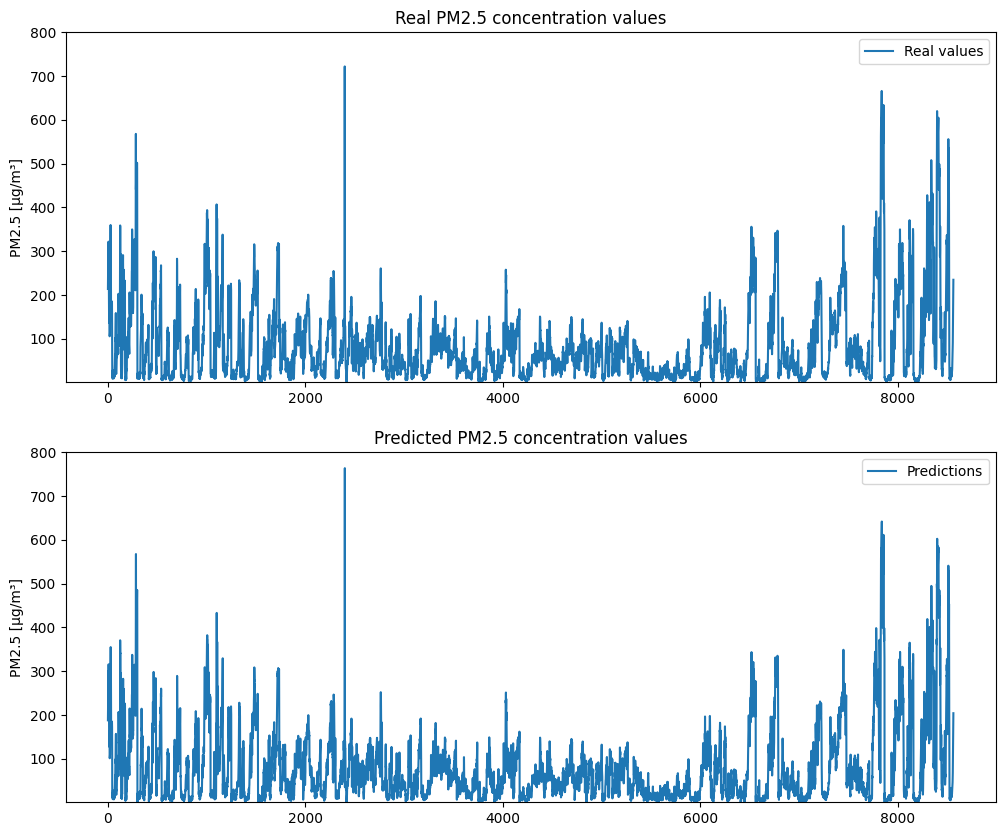

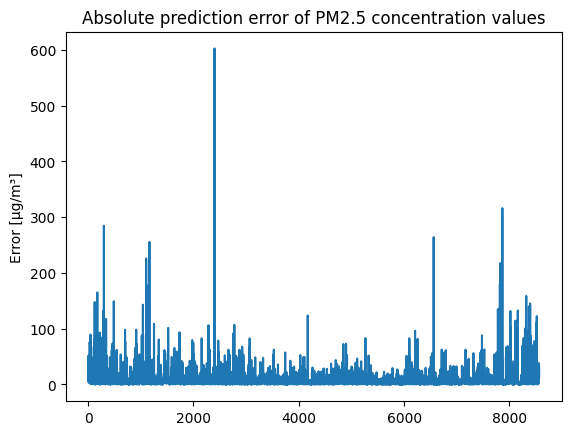

MAE: 10.90370050006691
Mean of expected values: 82.71725426103198


In [12]:
Y_expected = validation_set["PM_US Post"]
Y_pred = []
for i in range(train_size, length):
    Y_pred.append(
        autoreg_res.params[0] * df_beijing_1215.iloc[i-1]["PM_US Post"]
        + autoreg_res.params[1] * df_beijing_1215.iloc[i-2]["PM_US Post"]
        + autoreg_res.params[2] * df_beijing_1215.iloc[i-3]["PM_US Post"]
    )

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1, ylim=(1, 800))
plt.plot(Y_expected.values, label='Real values')
plt.title('Real PM2.5 concentration values')
plt.ylabel('PM2.5 [µg/m³]')
plt.legend()

plt.subplot(2, 1, 2, ylim=(1, 800))
plt.plot(Y_pred, label='Predictions')
plt.title('Predicted PM2.5 concentration values')
plt.ylabel('PM2.5 [µg/m³]')
plt.legend()
plt.show()

absolute_error = np.abs(Y_expected.values - Y_pred)
plt.plot(absolute_error)
plt.title('Absolute prediction error of PM2.5 concentration values')
plt.ylabel('Error [µg/m³]')
plt.show()

mean_absolute_error = absolute_error.sum()/len(Y_pred)
print("MAE: {}".format(mean_absolute_error))
print("Mean of expected values:", np.mean(Y_expected))

We can see that the predicted values using the model are quite reliable compared to the real observed values. However, the MAE might be relatively high for lower PM2.5 values, indicating a lack of accuracy in such cases. Additionally, the absolute error plot shows that the prediction errors vary, with noticeable spikes where PM2.5 concentrations fluctuate sharply, suggesting the model struggles with sudden pollution changes. This could imply a potential bias or robustness issue in predicting low vs. high values. If the model is used for decision-making, analyzing error acceptability is crucial. Lastly, comparing the MAE on training and test sets could reveal any overfitting or underfitting tendencies.

## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

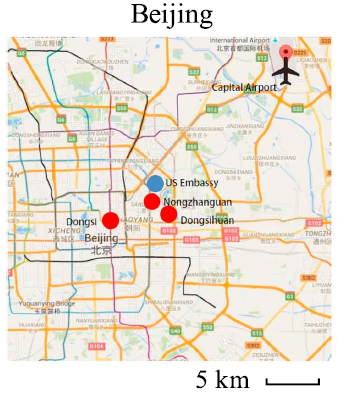


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [13]:
df = pd.read_csv("BeijingPM.csv")

df = df[(df["year"] >= 2012) & (df["year"] <= 2015) & (df["season"] == 4)]
df = df[(df["PM_Nongzhanguan"].notna()) & (df["PM_US Post"].notna())]

b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [14]:
print(stats.ttest_rel(df["PM_Nongzhanguan"], df["PM_US Post"]))

TtestResult(statistic=-21.21769799130861, pvalue=2.694804396978746e-96, df=5818)


La p-value est de 2.695e-96, ce qui est inférieur à 5%, on rejette donc H0. Ce qui ve dire que la moyenne d'émissions de PM2.5 au district de Nongzhanguan est différente de celle de l'ambassade américaine à Beijing.


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

We don't know if the average of PM_Nongzhanguan and PM_US Post are related,
if we can assume the difference between those averages to be following a 
normal distribution or if their variance is the same.
The Wilcoxon doesn't need those assumption so it is useful to us.

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [15]:
print(stats.wilcoxon(df["PM_Nongzhanguan"], df["PM_US Post"]))


WilcoxonResult(statistic=4283393.0, pvalue=2.7876634046482492e-186)


The p-value is 2.788e-186 which is less than 5%, therefore we reject H0. 
This means that the average PM2.5 concetration in the Nongzhanguan is different
from the average PM2.5 concentration at the US embassy in Beijing. 